# Inspired by Stanford MS&E 226 – Fundamentals of Data Science

## Seminar 4, Prediction


**HSE University**<br/>
**Spring 2022**<br/>

---

[https://forms.office.com/r/ELctnxeXRE](https://forms.office.com/r/ELctnxeXRE)

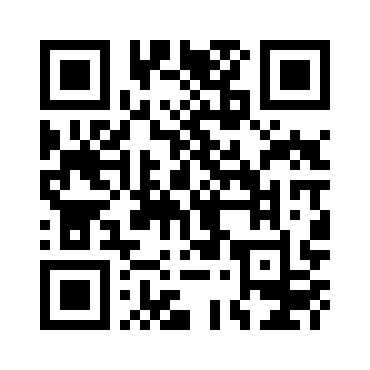

In [1]:
# !pip install qrcode[pil]
import qrcode
img = qrcode.make('https://forms.office.com/r/ELctnxeXRE')
img  # qrcode.image.pil.PilImage

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Prediction

Given data **X** and **Y**, construct a fitted model ˆf so that given a
new covariate vector X~ from the population, the prediction error
between ˆf(X~ ) and the corresponding Y is minimized.

## The case of Classification

In [3]:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

In [4]:
df_synt = pd.DataFrame({
    'x':X[0:,0],
    'y':X[0:,1],
    'real': y[0:]
})
df_synt.head()

,x,y,real
0,1.225160,-0.951731,1
1,1.016304,-1.725175,1
2,0.335340,-1.724896,1
3,1.786348,-1.782653,1
4,1.016751,1.062569,1


<AxesSubplot:xlabel='x', ylabel='y'>

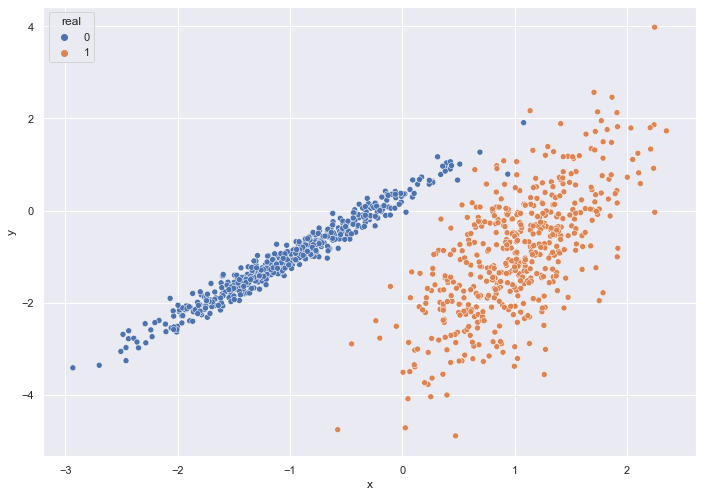

In [5]:
sns.scatterplot(data = df_synt, x = 'x', y = 'y', hue = 'real')

In [6]:
from sklearn.cluster import KMeans
data = df_synt.drop('real', axis = 1)

kmeans = KMeans(n_clusters=2, random_state=1).fit(data)
df_synt_predicted = df_synt.copy()
df_synt_predicted['kmean'] = kmeans.labels_

In [7]:
import hdbscan
hdbscaner = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels = hdbscaner.fit_predict(data)
df_synt_predicted['hdbscan'] = cluster_labels

In [8]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=0, covariance_type = "full")
cluster_labels = gm.fit_predict(data)
df_synt_predicted['gmm'] = cluster_labels

In [9]:
df_synt_predicted.head()

,x,y,real,kmean,hdbscan,gmm
0,1.225160,-0.951731,1,0,1,0
1,1.016304,-1.725175,1,0,1,0
2,0.335340,-1.724896,1,1,1,0
3,1.786348,-1.782653,1,0,-1,0
4,1.016751,1.062569,1,0,-1,0


In [10]:
df_synt_predicted['kmean'] = (df_synt_predicted['kmean']-1)**2
df_synt_predicted['gmm'] = (df_synt_predicted['gmm']-1)**2
df_synt_predicted.head()

,x,y,real,kmean,hdbscan,gmm
0,1.225160,-0.951731,1,1,1,1
1,1.016304,-1.725175,1,1,1,1
2,0.335340,-1.724896,1,0,1,1
3,1.786348,-1.782653,1,1,-1,1
4,1.016751,1.062569,1,1,-1,1


In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df_synt_predicted['real'], df_synt_predicted['kmean'])
cm

array([[397, 104],
       [135, 364]], dtype=int64)

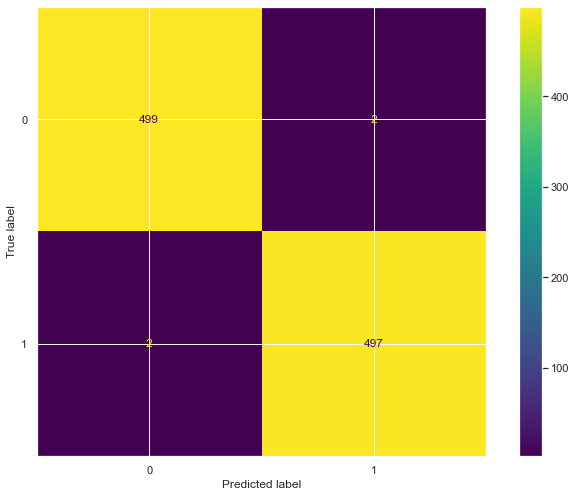

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(df_synt_predicted['real'], df_synt_predicted['gmm'])

In [13]:
from sklearn.metrics import accuracy_score
help(accuracy_score)

Help on function accuracy_score in module sklearn.metrics._classification:

accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
    Accuracy classification score.
    
    In multilabel classification, this function computes subset accuracy:
    the set of labels predicted for a sample must *exactly* match the
    corresponding set of labels in y_true.
    
    Read more in the :ref:`User Guide <accuracy_score>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) labels.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Predicted labels, as returned by a classifier.
    
    normalize : bool, default=True
        If ``False``, return the number of correctly classified samples.
        Otherwise, return the fraction of correctly classified samples.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    Ret

In [14]:
from sklearn.metrics import accuracy_score
for model in ['gmm', 'kmean', 'hdbscan']:
    print("Accuracy", model, ":")
    print(accuracy_score(df_synt_predicted['real'], df_synt_predicted[model]))

Accuracy gmm :
0.996
Accuracy kmean :
0.761
Accuracy hdbscan :
0.887


In [15]:
from sklearn.metrics import precision_score

In [16]:
help(precision_score)

Help on function precision_score in module sklearn.metrics._classification:

precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    Compute the precision.
    
    The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
    true positives and ``fp`` the number of false positives. The precision is
    intuitively the ability of the classifier not to label as positive a sample
    that is negative.
    
    The best value is 1 and the worst value is 0.
    
    Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : array-like, default=None
        The set of labels to include when ``average

In [17]:
for model in ['gmm', 'kmean', 'hdbscan']:
    print("Precision", model, ":")
    print(precision_score(df_synt_predicted['real'], df_synt_predicted[model], average="weighted"))

Precision gmm :
0.996
Precision kmean :
0.7619776524644947
Precision hdbscan :
0.9967086402360279


In [18]:
from sklearn.metrics import recall_score

In [19]:
help(recall_score)

Help on function recall_score in module sklearn.metrics._classification:

recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    Compute the recall.
    
    The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
    true positives and ``fn`` the number of false negatives. The recall is
    intuitively the ability of the classifier to find all the positive samples.
    
    The best value is 1 and the worst value is 0.
    
    Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : array-like, default=None
        The set of labels to include when ``average != 'binary'``, and their
        ord

In [20]:
from sklearn.metrics import recall_score
for model in ['gmm', 'kmean', 'hdbscan']:
    print("Recall", model, ":")
    print(recall_score(df_synt_predicted['real'], df_synt_predicted[model], average="weighted"))

Recall gmm :
0.996
Recall kmean :
0.761
Recall hdbscan :
0.887


C:\Users\wirze\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1. In what cases we care about Precision more than about Recall? Write a sentence describing such case.
2. In what cases we care about Recall more than about Precision? Write a sentence describing such case.

## Regression

from https://towardsdatascience.com/r-squared-recipe-5814995fa39a

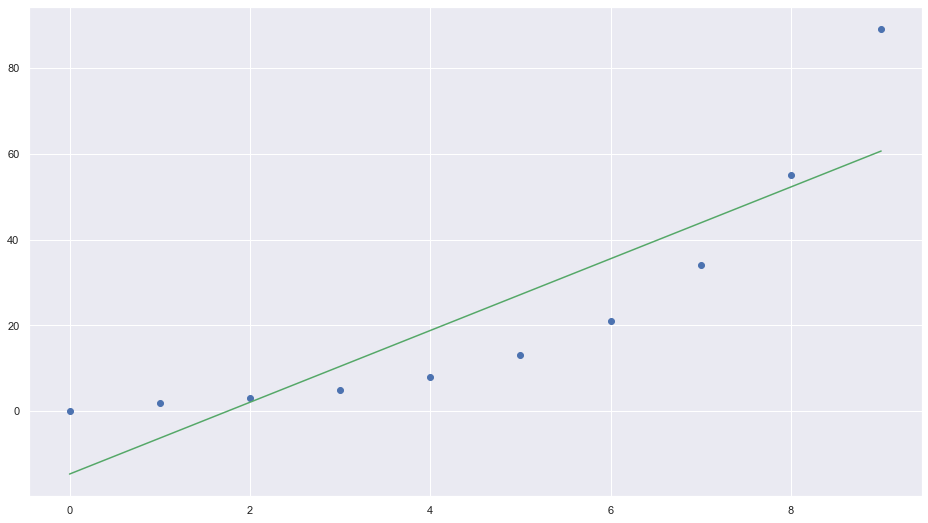

In [21]:
#importing
%matplotlib inline
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy import stats

from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"] = (16,9)

#creating data
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([0,2,3,5,8,13,21,34,55,89])

#creating OLS regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
def linefitline(b):
    return intercept + slope * b
line1 = linefitline(x)

#plot line
plt.scatter(x,y)
plt.plot(x,line1, c = 'g')
plt.show()

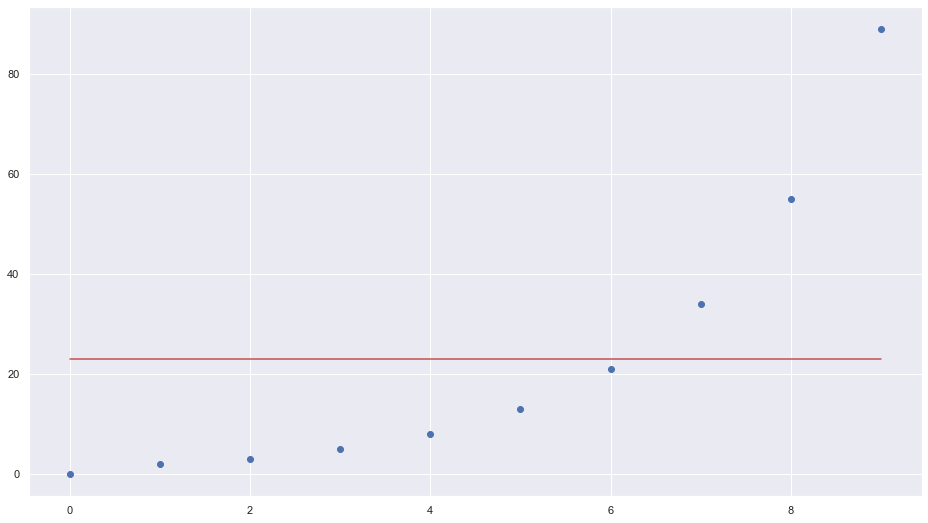

In [22]:
line2 = np.full(10,[y.mean()])
plt.scatter(x,y)
plt.plot(x,line2, c = 'r')
plt.show()

In [23]:
differences_line1 = linefitline(x)-y
line1sum = 0
for i in differences_line1:
    line1sum = line1sum + (i*i)
print("Squared differences for regression", line1sum)

Squared differences for regression 1753.0909090909095


In [24]:
differences_line2 = line2 - y
line2sum = 0
for i in differences_line2:
    line2sum = line2sum + (i*i)
print("Squared differences for mean", line2sum)

Squared differences for mean 7524.0


In [25]:
ESS = line2sum - line1sum
print("ESS", ESS)

ESS 5770.90909090909


In [26]:
RSS = line2sum
print("RSS", RSS)

RSS 7524.0


In [27]:
r2 = ESS/RSS
r2

0.7670001449905754

In [28]:
TSS = line1sum
RSS = line2sum
1- TSS/RSS

0.7670001449905756

In [29]:
r2 = r2_score(y, linefitline(x))
print('The rsquared value is: ' + str(r2))

The rsquared value is: 0.7670001449905756


Lets go back to real world.
Imagine, we are trying to make a model about

[Text(0.5, 0, 'Number of cores'), Text(0, 0.5, 'Price')]

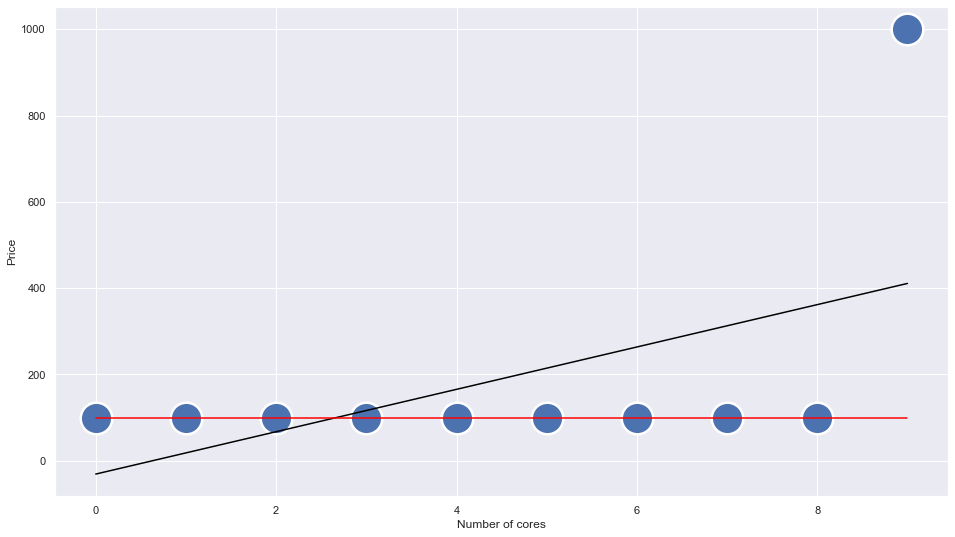

In [30]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([100,100,100,100,100,100,100,100,100,1000])

#creating OLS regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
def linefitline(b):
    return intercept + slope * b
line1 = linefitline(x)
line2 = np.full(10,[stats.mode(y)[0]])
#plot line
ax = sns.scatterplot(x =x, y  = y, s = 1000)
sns.lineplot(x = x, y = line1, color = "black")
sns.lineplot(x = x, y = line2, color = 'red')
ax.set(xlabel='Number of cores', ylabel='Price')

<AxesSubplot:>

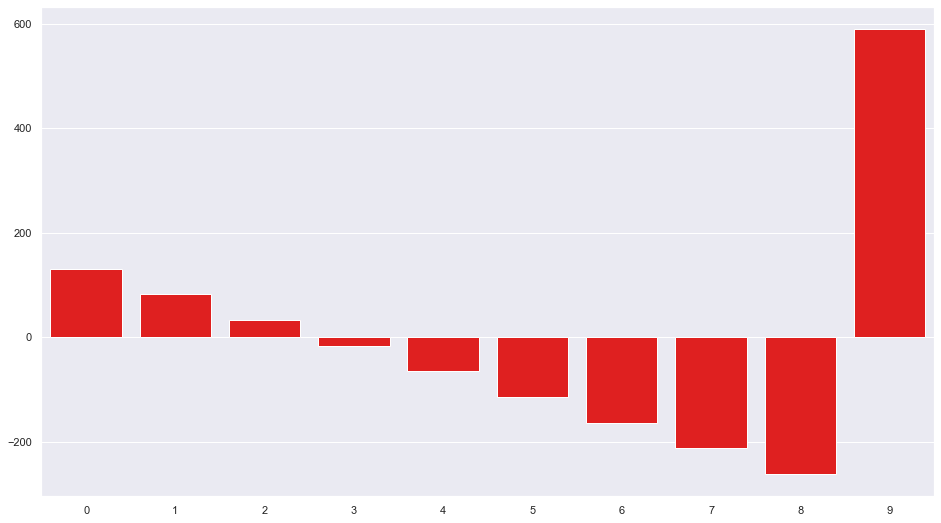

In [31]:
line1 = linefitline(x)
y - line1

sns.barplot(x = x, y = y - line1, color = 'red')

<AxesSubplot:>

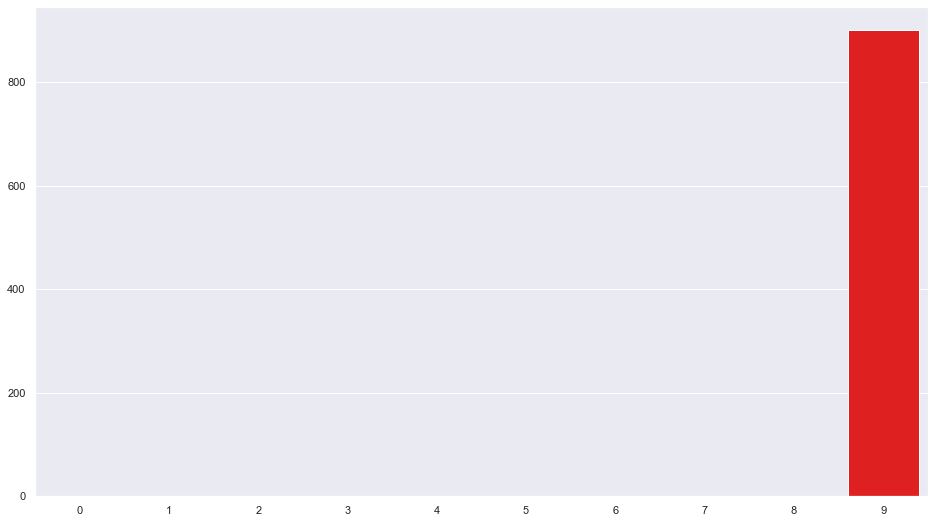

In [32]:
sns.barplot(x = x, y = y - line2, color = 'red')

In [33]:
np.mean(y - line2)

90.0

In [34]:
np.mean(y - line1)

1.1368683772161604e-14

In [35]:
df_prices = pd.DataFrame({
    "real": y,
    "regression" : line1,
    "mode" : line2
})
df_prices

,real,regression,mode
0,100,-30.909091,100
1,100,18.181818,100
2,100,67.272727,100
3,100,116.363636,100
4,100,165.454545,100
5,100,214.545455,100
6,100,263.636364,100
7,100,312.727273,100
8,100,361.818182,100
9,1000,410.909091,100


In [36]:
error = 10
df_prices["regression_b"] = (df_prices["regression"] - df_prices['real'])**2 <= error**2
df_prices["mode_b"] = (df_prices["mode"] - df_prices['real'])**2 <= error**2
df_prices[['regression_b', 'mode_b']].aggregate(['mean'])

,regression_b,mode_b
mean,0.0,0.9


## how about actual prediction

[data from](https://www.kaggle.com/datasets/kolawale/focusing-on-mobile-app-or-website?datasetId=349053&sortBy=voteCount)

This dataset is having data of customers who buys clothes online. The store offers in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.



In [37]:
df = pd.read_csv("Ecommerce Customers.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [38]:
len(df)

500

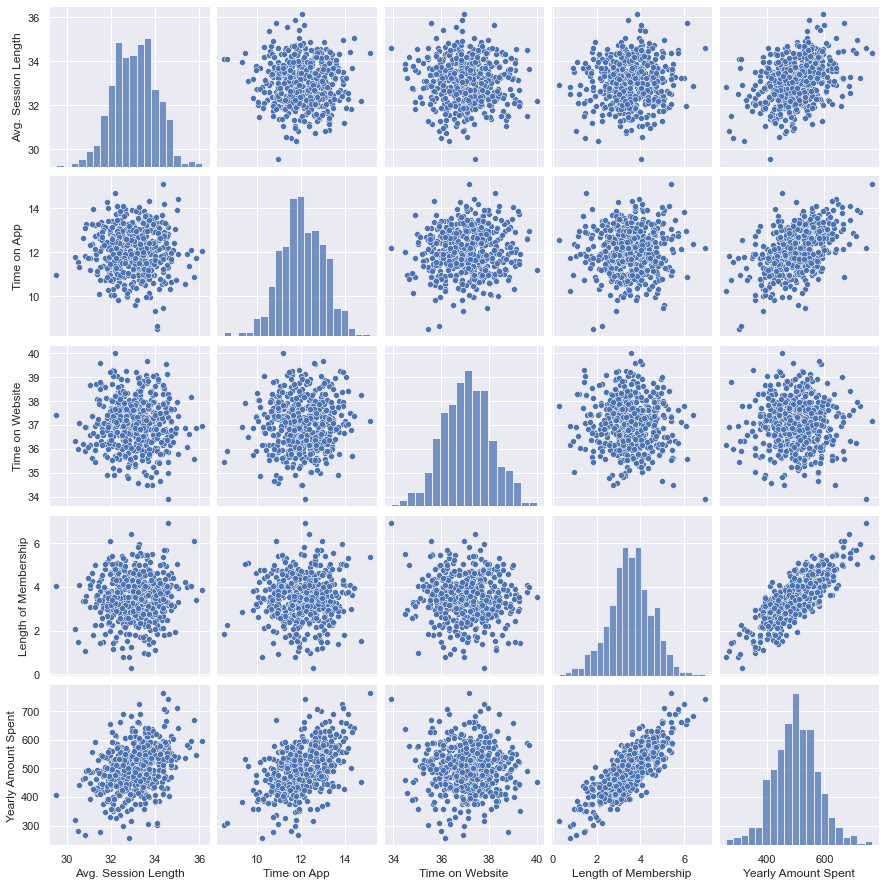

In [39]:
sns.pairplot(df)

In [40]:
df_num = df.\
    select_dtypes(include=np.number)
df_num.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_num.drop(['Yearly Amount Spent', 'Length of Membership'], axis = "columns"),
    df_num['Yearly Amount Spent'],
    test_size=0.2, random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.3749672551628095

In [43]:
reg.score(X_test, y_test)

0.42132639950926953

In [44]:
df = pd.read_csv("StudentsPerformance.csv")
df_dumm = pd.get_dummies(df,
                         columns = ['gender', 'race/ethnicity', 'parental level of education',
                                    'lunch', 'test preparation course'], drop_first=True)
df_dumm.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,1,0,1,0,0,0,0,0,1,0,1,1


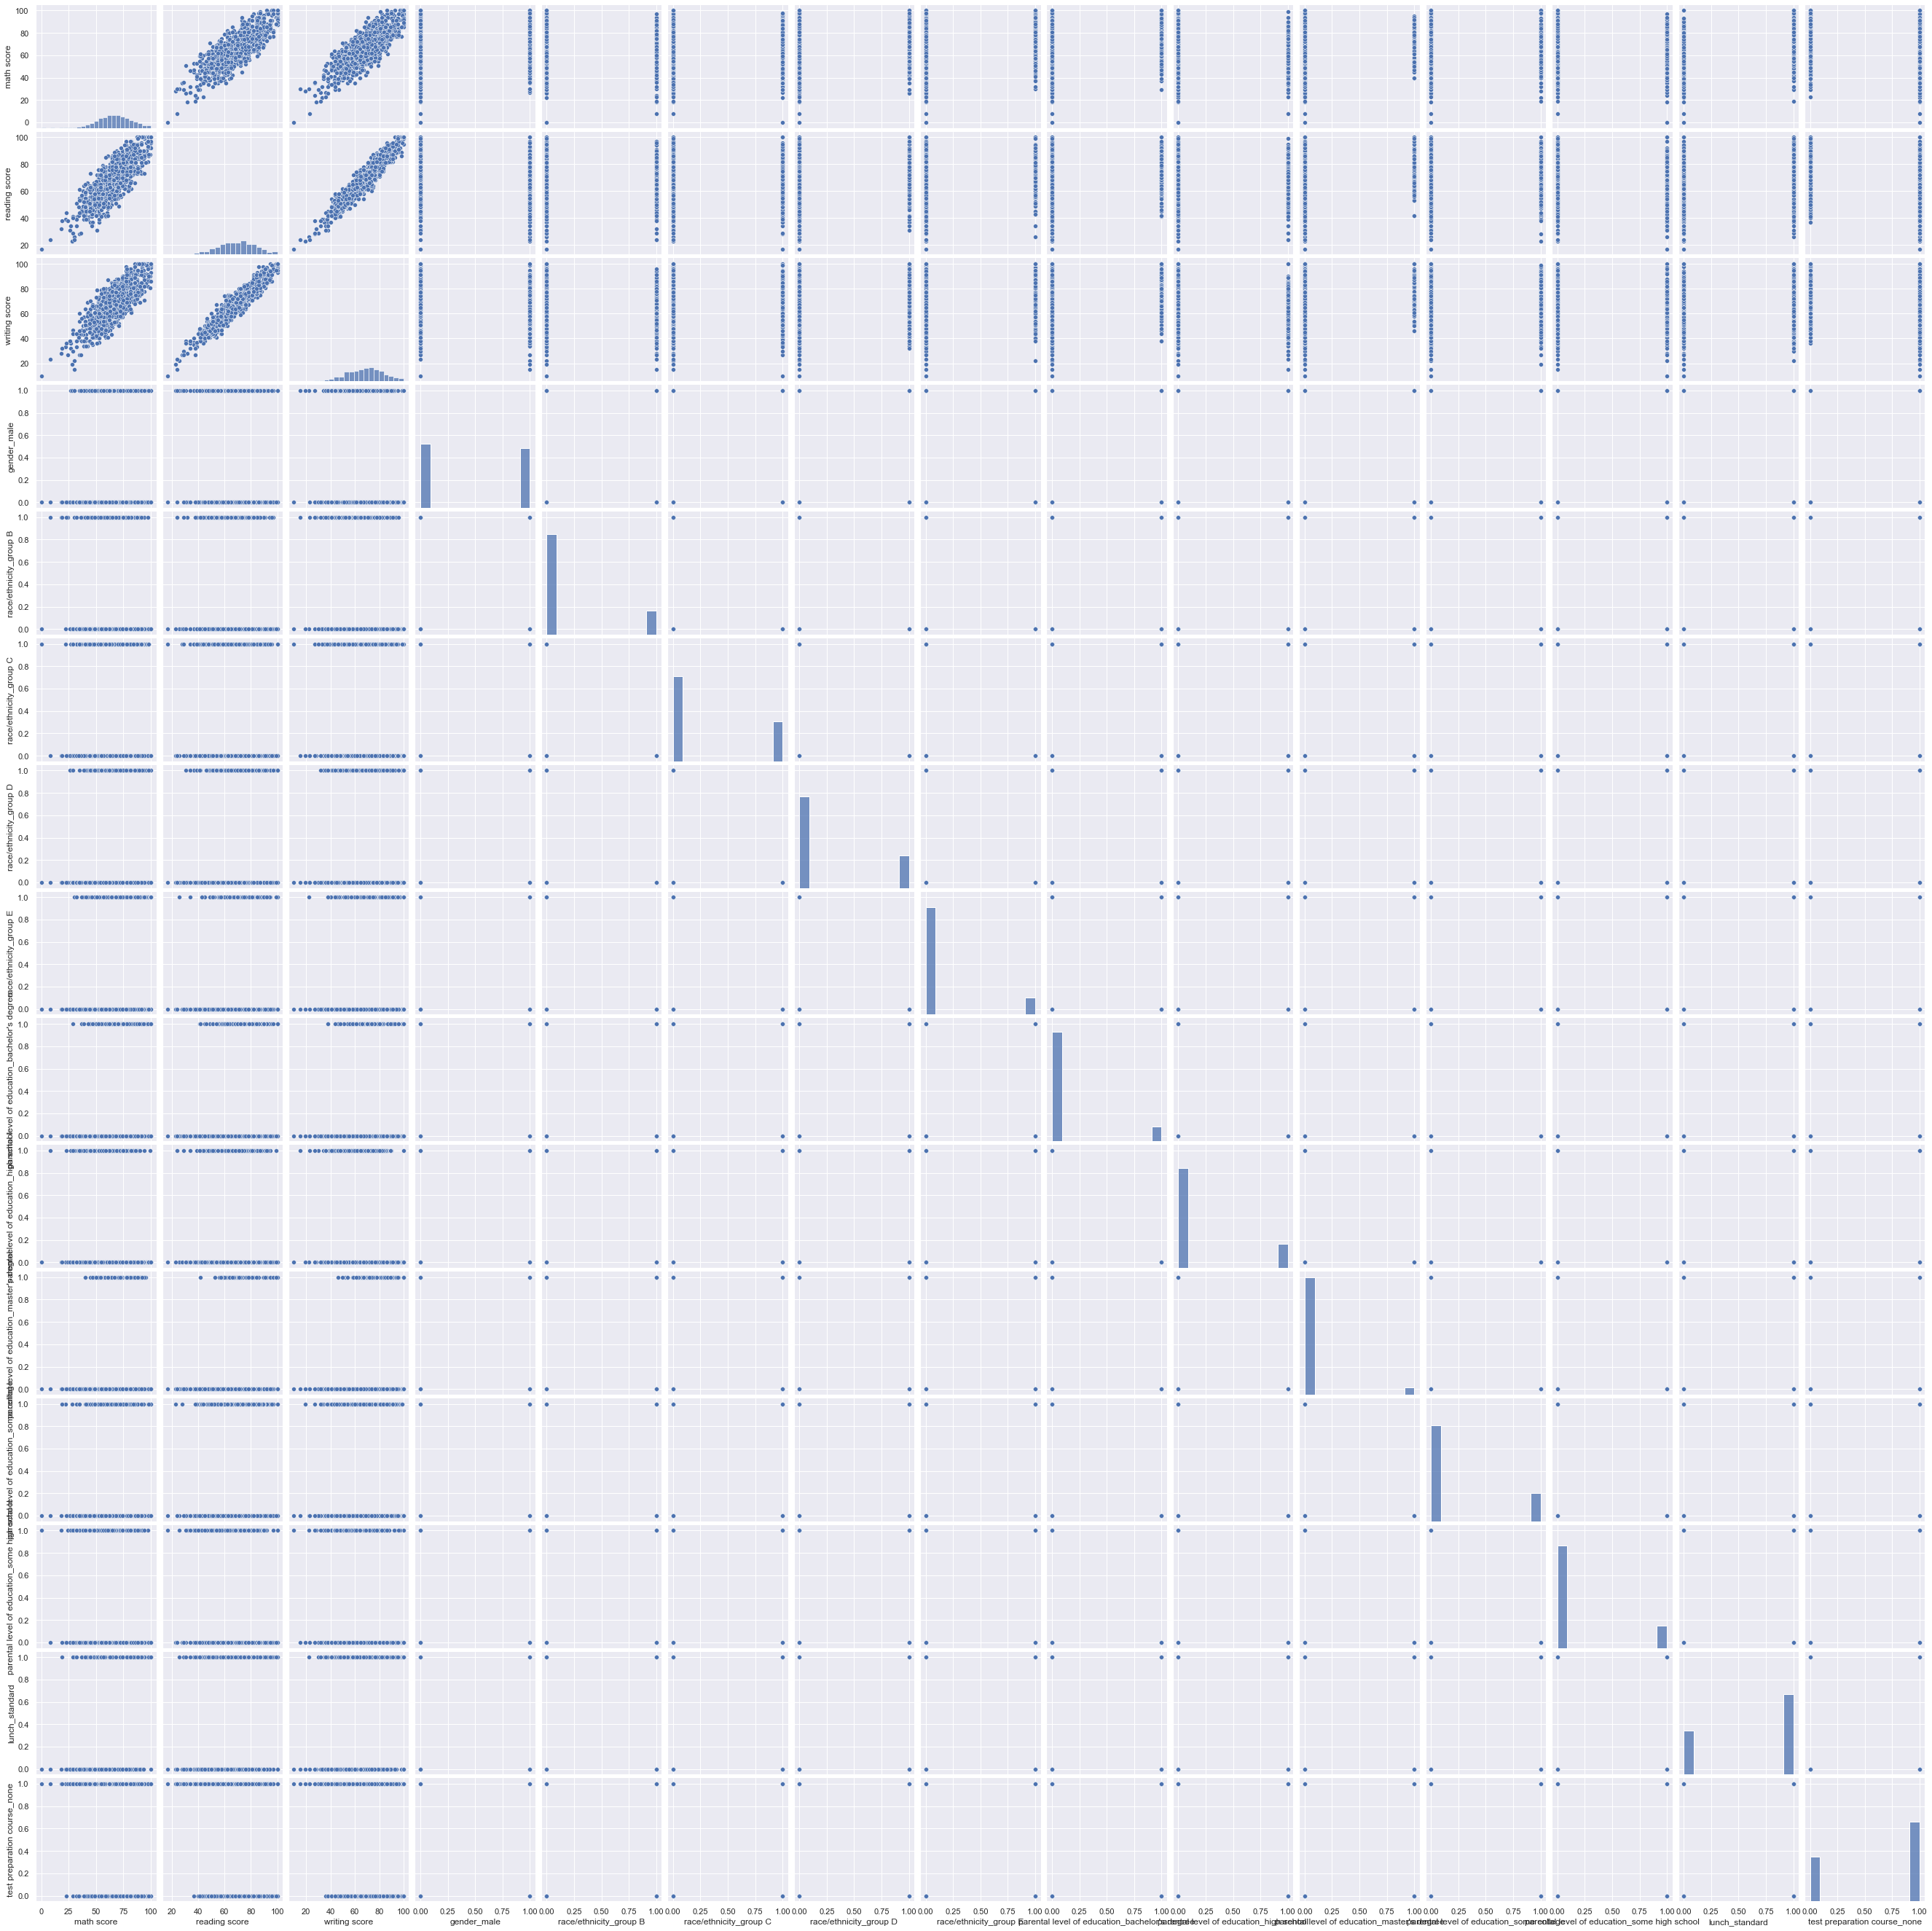

In [45]:
sns.pairplot(df_dumm)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    df_dumm.drop(['writing score', 'reading score'], axis = "columns"),
    df_dumm['writing score'],
    test_size=0.975, random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.9727116984259826

In [48]:
reg.score(X_test, y_test)

0.7979205102967888

## validation

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, X_train, y_train, cv=5)
scores

array([-1.67929748,  0.19135573,  0.9832312 ,  0.76026611,  0.84932571])

In [50]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(reg, X_test, y_test, cv=5)
# (y_pred - y_test)**2
r2_score(y_test, y_pred)

0.8803094674756533

## task
Try to build a regression model based on
[Life expectancy by who](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)

1. look at the data description
2. build a model to predict the Life expectancy
3. evaluate the quality of your model on test and train sets
4. use validation set to improve the quality of your model
5. interpret the results